In [ ]:
!pip install numpy==1.21

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 14.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1


In [ ]:
!pip install -q tensorflow==2.3.0

     |████████████████████████████████| 320.5 MB 1.1 kB/s 
     |████████████████████████████████| 20.6 MB 107.4 MB/s 
     |████████████████████████████████| 459 kB 77.6 MB/s 
     |████████████████████████████████| 2.9 MB 73.3 MB/s 
     |████████████████████████████████| 26.0 MB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
xarray-einstats 0.4.0 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
xarray-einstats 0.4.0 requires scipy>=1.6, but you have scipy 1.4.1 which is incompatible.
tifffile 2022.10.10 requires numpy>=1.19.2, but you have numpy 1.18.5 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
plotnine 0.8.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompa

In [ ]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 20.63 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [ ]:
!pip install -Uqr models/official/requirements.txt


     |████████████████████████████████| 10.7 MB 13.7 MB/s 
     |████████████████████████████████| 215 kB 68.4 MB/s 
     |████████████████████████████████| 17.3 MB 63.8 MB/s 
     |████████████████████████████████| 12.2 MB 60.8 MB/s 
     |████████████████████████████████| 280 kB 73.1 MB/s 
     |████████████████████████████████| 33.8 MB 166 kB/s 
     |████████████████████████████████| 238 kB 63.2 MB/s 
     |████████████████████████████████| 5.2 MB 55.7 MB/s 
     |████████████████████████████████| 1.1 MB 64.3 MB/s 
     |████████████████████████████████| 352 kB 73.3 MB/s 
     |████████████████████████████████| 1.3 MB 51.9 MB/s 
     |████████████████████████████████| 9.4 MB 54.8 MB/s 
     |████████████████████████████████| 49.2 MB 168 kB/s 
     |████████████████████████████████| 3.2 MB 52.3 MB/s 
     |████████████████████████████████| 965 kB 63.0 MB/s 
     |████████████████████████████████| 295 kB 64.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 439 kB 56.0 MB/s 
     |████████████████████████████████| 1.7 MB 65.2 MB/s 
     |████████████████████████████████| 6.0 MB 59.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.11.0


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.11.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('training_data.csv')
df.shape

(2993, 2)

In [ ]:
df2 = pd.read_csv('validation_data.csv')
df = pd.concat([df,df2])

In [ ]:
df.head(3)

,Sentence,Label
0,"The purpose of this website, 9gag.com (the “Si...",unc
1,"You agree that neither 9GAG, Inc nor the Site ...",ltd2
2,"9GAG, Inc retains the right to create limits o...",ter3


In [ ]:
df.columns = ['question_text','target']

<AxesSubplot: >

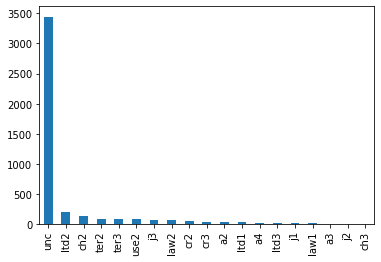

In [ ]:
df.target.value_counts().plot.bar()

In [ ]:
df.target = 1-pd.to_numeric(df.target=='unc')

In [ ]:
df = df.sample(frac=1)

In [ ]:
dfp = df.copy()

In [ ]:
l0 = df[df.target==0]
l1 = df[df.target==1]
len(l0),len(l1)

(3448, 818)

In [ ]:
df = pd.concat([l0[:len(l1)],l1])

In [ ]:
df = df.sample(frac=1)

In [ ]:
train_df,valid_df = train_test_split(df,random_state=42,train_size=0.9,stratify=df.target.values)
train_df.shape,valid_df.shape

((1472, 2), (164, 2))

<AxesSubplot: >

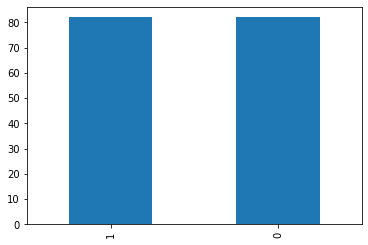

In [ ]:
valid_df.target.value_counts().plot.bar()

In [ ]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df.question_text.values, train_df.target.values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df.question_text.values, valid_df.target.values))

  for text, label in train_data.take(1):
    print(text)
    print(label)

tf.Tensor(b'Because of this, in your communications with Linden Lab, please keep in mind that Linden Lab does not accept or consider any unsolicited ideas or materials for products or services, or even improvements to products or services, (collectively, "Unsolicited Ideas and Materials"). Therefore, you must not send to Linden Lab (even within any of your User Content that we may request), in any form and by any means, any Unsolicited Ideas and Materials. Any Unsolicited Ideas and Materials you post on or send to us via the Service are deemed User Content and licensed to us as set forth above.', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
label_list = [0, 1] # Label categories
max_seq_length = 128 # maximum length of (token) input sequences
train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [ ]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?'))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

In [ ]:
def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid = None,
                                            text_a = text.numpy(), 
                                            text_b = None, 
                                            label = label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list,
                                    max_seq_length, tokenizer)
  
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

In [ ]:
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label], 
                                Tout=[tf.int32, tf.int32, tf.int32, tf.int32])

  # py_func doesn't set the shape of the returned tensors.
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
        'input_word_ids': input_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
    }
  return (x, label_id)

In [ ]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map,
                              num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          #.cache()
                          .shuffle(1000)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))

  # valid
  valid_data = (valid_data.map(to_feature_map,
                            num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE)) 

In [ ]:
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
valid_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                      name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_type_ids")

  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

  drop = tf.keras.layers.Dropout(0.4)(pooled_output)
  output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(drop)

  model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids
    },
    outputs=output)
  return model

In [ ]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
                     loss=tf.keras.losses.BinaryCrossentropy(),
                     metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 128, 768)]                'input_mask[0][0]',         

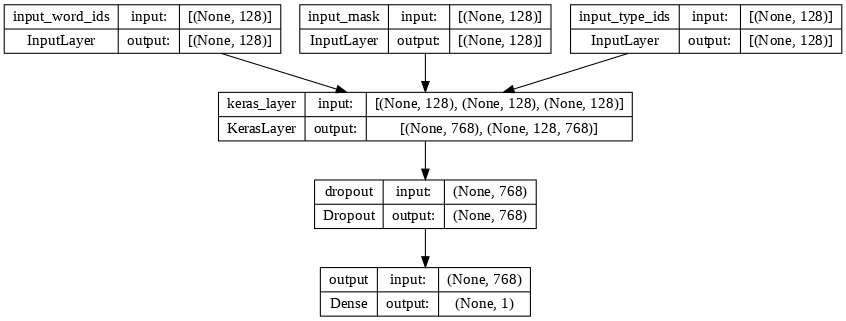

In [ ]:
tf.keras.utils.plot_model(model=model,show_shapes=True,dpi=76)

In [ ]:
# Train model
epochs=1
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1,)

46/46 [==============================] - 103s 863ms/step - loss: 0.5065 - binary_accuracy: 0.7446 - val_loss: 0.1796 - val_binary_accuracy: 0.9500


In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

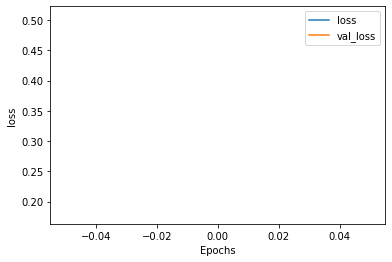

In [ ]:
plot_graphs(history,'loss')

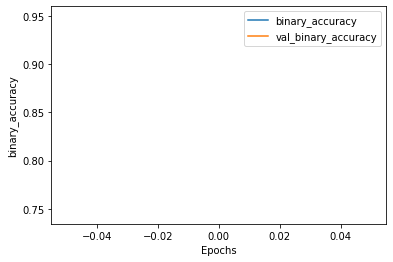

In [ ]:
plot_graphs(history,'binary_accuracy')

In [ ]:
sample_example = ["Arbitration is more informal than a lawsuit in court",\
                  "claims that are currently the subject of purported class action litigation in which you are not a member of a certified class; and",\
                  "Usage by others can be restricted by use of parental controls or similar features. Visit /securefamily to learn more.",\
                  "A party who intends to seek arbitration must first send to the other, by certified mail, a written Notice of Dispute",\
                  " All issues are for the arbitrator to decide, except that issues relating to the scope and enforceability of the arbitration provision are for the court to decide",
                  ]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
preds

5/5 [==============================] - 1s 11ms/step


array([[0.15835388],
       [0.06880604],
       [0.0364288 ],
       [0.5627847 ],
       [0.6511976 ]], dtype=float32)

In [ ]:
['Toxic' if pred >=0.5 else 'Sincere' for pred in preds]

['Sincere', 'Sincere', 'Sincere', 'Toxic', 'Toxic']

In [ ]:
sample_example = dfp.question_text
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
# preds

4266/4266 [==============================] - 56s 13ms/step


In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(preds)):
  if(preds[i][0]>0.9):
    if(dfp.target.values[i]==1):
      tp+=1
    else:
      fp+=1
  else:
    if(dfp.target.values[i]==0):
      tn+=1
    else:
      fn+=1


In [ ]:
len(preds),tp,tn,fp,fn

(4266, 608, 3314, 134, 210)

In [ ]:
model.save_weights('weights')

In [ ]:
del model

In [ ]:
!pip install pyyaml h5py 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = create_model()
model.load_weights('weights')

In [ ]:
preds = model.predict(test_data)

4266/4266 [==============================] - 50s 12ms/step
